In [2]:
import numpy as np
import pandas as pd
from scipy.special import rel_entr, kl_div
from scipy.stats import entropy, ks_2samp
from scipy.spatial.distance import jensenshannon
from skmultiflow.drift_detection import DDM, PageHinkley, ADWIN
from skmultiflow.data import ConceptDriftStream
import datetime
import matplotlib.pyplot as plt

# Lifelong learning

###### Continual Lifelong Learning with Neural Networks: A Review
https://arxiv.org/abs/1802.07569

# Feature drift

### A survey on feature drift adaptation: Definition, benchmark, challenges and future directions
https://www.sciencedirect.com/science/article/pii/S0164121216301030#bib0046
# $$\Downarrow$$
#### Dynamic Feature Space and Incremental Feature Selection for the Classiflcation of Textual Data Streams
www.researchgate.net/publication/250302474_Dynamic_Feature_Space_and_Incremental_Feature_Selection_for_the_Classiflcation_of_Textual_Data_Streams
###### Dataset:
https://spamassassin.apache.org/old/publiccorpus/

###### Another interesting dataset about spam (): 
https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary.html#webspam

#### Heterogeneous Ensemble for Feature Drifts in Data Streams
https://www.researchgate.net/publication/229067302_Heterogeneous_Ensemble_for_Feature_Drifts_in_Data_Streams
###### Dataset:
http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html

### Drift Detection Using Uncertainty Distribution Divergence
https://www.researchgate.net/publication/220766509_Drift_Detection_Using_Uncertainty_Distribution_Divergence

###### Datasets:
1) http://www.daviddlewis.com/resources/testcollections/reuters21578/  
2) http://qwone.com/~jason/20Newsgroups/

### USP DATA STREAM REPOSITORY:
https://sites.google.com/view/uspdsrepository

### Learning model trees from evolving data streams
https://www.researchgate.net/publication/225878881_Learning_model_trees_from_evolving_data_streams

#### Airline dataset
https://community.amstat.org/jointscsg-section/dataexpo/dataexpo2009

### Incremental Learning of Concept Drift from Streaming Imbalanced Data
https://www.semanticscholar.org/paper/Incremental-Learning-of-Concept-Drift-from-Data-Ditzler-Polikar/b32d65b6208eb581f46b6908225e90513312ad86
#### Electricity
ftp://ftp.cse.unsw.edu.au/pub/doc/papers/UNSW/9905.pdf
#### NOAA Weather
 ftp://ftp.ncdc.noaa.gov/pub/data/gsod


## Total Variance Distance 
### tvd = $\frac{\sum diff_{abs}}{2}$

http://data8.org/fa15/text/3_inference.html \
https://docs.aws.amazon.com/sagemaker/latest/dg/sagemaker-dg.pdf#clarify-data-bias-metric-total-variation-distance

In [162]:
dist1 = np.array([0.15, 0.18, 0.12, 0.54, 0.01])
dist2 = np.array([0.26, 0.08, 0.08, 0.54, 0.04])

In [163]:
tvd = sum(abs(dist1 - dist2))/2
tvd

0.14

## Kullback-Leibler Divergence

### $D_{KL}(P||Q) = \sum P(x)\log(\frac{P(x)}{Q(x)})$

https://machinelearningmastery.com/divergence-between-probability-distributions/

In [164]:
print('rel_entr: ', sum(rel_entr(dist1, dist2)))
print('kl_div: ', sum(kl_div(dist1, dist2))) # kl_div = rel_entr( x, y ) - x + y
print('entropy: ', entropy(dist1, dist2))

rel_entr:  0.09825335774282917
kl_div:  0.0982533577428292
entropy:  0.09825335774282917


## Jensen-Shannon Divergence

$D_{JS}(P || Q) = \frac{1}{2} * D_{KL}(P || M) + \frac{1}{2} * D_{KL}(Q || M)$ \
$M = \frac{Q+P}{2}$ \
$DIST_{JS} = \sqrt{D_{JS}}$

In [165]:
js_div = lambda x, y: (entropy(x, (x + y)/2) + entropy(y, (x + y)/2))/2
print('jensenshannon: ', jensenshannon(dist1, dist2))
print('js_div: ', js_div(dist1, dist2))

jensenshannon:  0.15546410214041506
js_div:  0.024169087054325404


## Kolmogorov-Smirnov test

https://www.datadoghq.com/blog/engineering/robust-statistical-distances-for-machine-learning/

In [166]:
ks_2samp(dist1, dist2)

Ks_2sampResult(statistic=0.4, pvalue=0.873015873015873)

# Concept drift

https://scikit-multiflow.readthedocs.io/en/stable/api/api.html#module-skmultiflow.drift_detection

## DDM

https://scikit-multiflow.readthedocs.io/en/stable/api/generated/skmultiflow.drift_detection.DDM.html#skmultiflow.drift_detection.DDM

In [188]:
ddm = DDM()

data_stream = np.random.randint(2, size=2000)
for i in range(999, 1500):
    data_stream[i] = 0
    
for i in range(2000):
    ddm.add_element(data_stream[i])
#     if ddm.detected_warning_zone():
#         print('Warning zone has been detected in data: ' + str(data_stream[i]) + ' - of index: ' + str(i))
    if ddm.detected_change():
        print('Change has been detected in data: ' + str(data_stream[i]) + ' - of index: ' + str(i))

Change has been detected in data: 1 - of index: 1740


In [182]:
stream = ConceptDriftStream()

In [183]:
stream.n_features #= 1

9

## PageHinkley

https://scikit-multiflow.readthedocs.io/en/stable/api/generated/skmultiflow.drift_detection.PageHinkley.html?highlight=PageHinkley

In [186]:
ph = PageHinkley()

data_stream = np.random.randint(2, size=2000)

for i in range(999, 2000):
    data_stream[i] = np.random.randint(4, high=8)

for i in range(2000):
    ph.add_element(data_stream[i])
    if ph.detected_change():
        print('Change has been detected in data: ' + str(data_stream[i]) + ' - of index: ' + str(i))

Change has been detected in data: 6 - of index: 1009


## ADWIN

https://scikit-multiflow.readthedocs.io/en/stable/api/generated/skmultiflow.drift_detection.ADWIN.html?highlight=ADWIN

In [202]:
adwin = ADWIN()

data_stream = np.random.randint(2, size=2000)

for i in range(999, 2000):
    data_stream[i] = np.random.randint(4, high=8)
    
for i in range(2000):
    adwin.add_element(data_stream[i])
    if adwin.detected_change():
        print('Change detected in data: ' + str(data_stream[i]) + ' - at index: ' + str(i))

Change detected in data: 6 - at index: 1023
Change detected in data: 6 - at index: 1055
Change detected in data: 4 - at index: 1087
Change detected in data: 6 - at index: 1311


## Paired Learners

http://cs.brown.edu/people/sbach/files/bach-icdm08.pdf

# Testing datasets

### 1) Airlines

In [20]:
df_airlines_2008 = pd.read_csv('DataExpo2009/2008.csv')
df_airlines_2000 = pd.read_csv('DataExpo2009/2000.csv')
df_airlines_1987 = pd.read_csv('DataExpo2009/1987.csv')
print('Done at ', datetime.datetime.now())

Done at  2021-09-23 23:53:26.511210


In [29]:
df_airlines_2000[pd.isnull(df_airlines_2000.CarrierDelay).apply(lambda x: x)]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2000,1,28,5,1647.0,1647,1906.0,1859,HP,154,...,15,11,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2000,1,29,6,1648.0,1647,1939.0,1859,HP,154,...,5,47,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2000,1,30,7,NaN,1647,NaN,1859,HP,154,...,0,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2000,1,31,1,1645.0,1647,1852.0,1859,HP,154,...,7,14,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2000,1,1,6,842.0,846,1057.0,1101,HP,609,...,3,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5683042,2000,12,9,6,615.0,613,941.0,945,AA,705,...,11,18,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5683043,2000,12,10,7,619.0,613,925.0,945,AA,705,...,8,15,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5683044,2000,12,11,1,611.0,613,949.0,945,AA,705,...,8,12,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5683045,2000,12,12,2,613.0,613,1005.0,945,AA,705,...,9,18,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [4]:
for col in df_airlines_2000:
    print(df_airlines_2000[col].unique())

[2000]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[28 29 30 31  1  2  3  4  5  6  7  9 10 11 12 13 14 16 17 18 19 20 21 23
 24 25 26 27  8 15 22]
[5 6 7 1 2 3 4]
[1647. 1648.   nan ...  426.  427.  412.]
[1647  846 1657 ...  534  230 2357]
[1906. 1939.   nan ...  403.  405.  401.]
[1859 1101 1908 ...  237  454  219]
['HP' 'WN' 'CO' 'US' 'DL' 'UA' 'AA' 'NW' 'AS' 'TW' 'AQ']
[ 154  609  611 ... 6541 6430 2900]
['N808AW' 'N653AW' 'N801AW' ... 'N3739P' 'N3738B' 'N3740C']
[259. 291.  nan 247. 255. 299. 277. 250. 243. 266. 275. 239. 236. 254.
 253. 261. 234. 246. 251. 233. 245. 263. 258. 283. 265. 272. 248. 279.
 249. 260. 271. 269. 274. 257. 244. 252. 268. 278. 378. 143. 147. 155.
 156. 158. 145. 148. 138. 149. 136. 140. 146. 152. 137. 151. 157. 142.
 154. 126. 160. 153. 150. 164. 163. 168. 159. 141. 144. 173. 172. 165.
 161. 129. 134. 167. 169. 135. 133. 139. 166. 127. 130. 132. 131. 162.
 230. 235. 237. 225. 223. 226. 241. 232. 238. 229. 220. 210. 227. 240.
 267. 231. 242. 218. 217. 219. 211. 2

['ATL' 'AUS' 'BHM' 'BNA' 'BOS' 'BUR' 'BWI' 'CLE' 'CLT' 'CMH' 'COS' 'CVG'
 'DEN' 'DFW' 'DTW' 'ELP' 'EWR' 'FLL' 'HOU' 'IAD' 'IAH' 'ICT' 'IND' 'JFK'
 'LAS' 'LAX' 'LGB' 'LIT' 'MCI' 'MCO' 'MDW' 'MEM' 'MIA' 'MKE' 'MSP' 'MSY'
 'OAK' 'OKC' 'OMA' 'ONT' 'ORD' 'PDX' 'PHL' 'PIT' 'PVD' 'RNO' 'SAN' 'SAT'
 'SDF' 'SEA' 'SFO' 'SJC' 'SLC' 'SMF' 'SNA' 'STL' 'TPA' 'TUL' 'TUS' 'ABE'
 'ALB' 'AVP' 'BDL' 'BGM' 'BTV' 'BUF' 'CAK' 'CRW' 'DAY' 'DCA' 'ELM' 'ERI'
 'GRR' 'GSO' 'HPN' 'ITH' 'LEX' 'LGA' 'MDT' 'MHT' 'ORF' 'PBI' 'PHX' 'PWM'
 'RDU' 'RIC' 'ROA' 'ROC' 'RSW' 'SBN' 'SJU' 'SYR' 'TOL' 'JAX' 'MLU' 'MOB'
 'GEG' 'JNU' 'WRG' 'BOI' 'ABQ' 'DAL' 'HRL' 'ANC' 'FAI' 'HNL' 'KTN' 'PSP'
 'EGE' 'EUG' 'KOA' 'LIH' 'MFR' 'MRY' 'OGG' 'SBA' 'JAN' 'STT' 'BIL' 'BZN'
 'FCA' 'GTF' 'HLN' 'JAC' 'MSO' 'PSC' 'CID' 'DSM' 'FSD' 'HDN' 'LNK' 'MLI'
 'PIA' 'SGF' 'SHV' 'SRQ' 'TYS' 'ISP' 'PSG' 'CDV' 'GSP' 'BTR' 'GPT' 'VPS'
 'STX' 'HSV' 'MGM' 'PNS' 'AZO' 'BIS' 'DLH' 'FAR' 'GFK' 'GRB' 'LAN' 'LSE'
 'MBS' 'MOT' 'MSN' 'RAP' 'RST' 'SUX' 'OTZ' 'SWF' 'O

1987


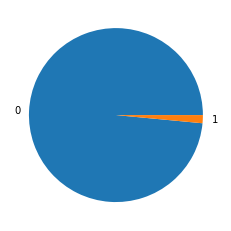

,Cancelled
Cancelled,
0,0.984994
1,0.015006


In [31]:
fig, ax = plt.subplots()
ax.pie(df_airlines_1987.groupby('Cancelled').agg({'Cancelled' : 'count'})['Cancelled'], labels= [0, 1])
print(1987)
plt.show()
df_airlines_1987.groupby('Cancelled').agg({'Cancelled': lambda x: x.count()/ df_airlines_1987['Cancelled'].count()})

2000


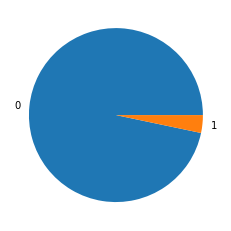

,Cancelled
Cancelled,
0,0.967009
1,0.032991


In [32]:
fig, ax = plt.subplots()
ax.pie(df_airlines_2000.groupby('Cancelled').agg({'Cancelled' : 'count'})['Cancelled'], labels= [0, 1])
print(2000)
plt.show()
df_airlines_2000.groupby('Cancelled').agg({'Cancelled': lambda x: x.count()/ df_airlines_2000['Cancelled'].count()})

2008


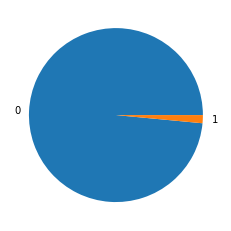

,Cancelled
Cancelled,
0,0.980394
1,0.019606


In [33]:
fig, ax = plt.subplots()
ax.pie(df_airlines_1987.groupby('Cancelled').agg({'Cancelled' : 'count'})['Cancelled'], labels= [0, 1])
print(2008)
plt.show()
df_airlines_2008.groupby('Cancelled').agg({'Cancelled': lambda x: x.count()/ df_airlines_2008['Cancelled'].count()})

In [52]:
%%time
cancelled_flight = []
for year in range(1987, 2009):
    print(year)
    df_tmp = pd.read_csv('DataExpo2009/{0}.csv'.format(year))
    cancelled_flight.append(df_tmp.groupby('Cancelled') \
                            .agg({'Cancelled': lambda x: x.count()/ df_tmp['Cancelled'].count()})['Cancelled'][1])

1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003


<string>:2: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.


2004
2005
2006
2007
2008
Wall time: 6min 10s


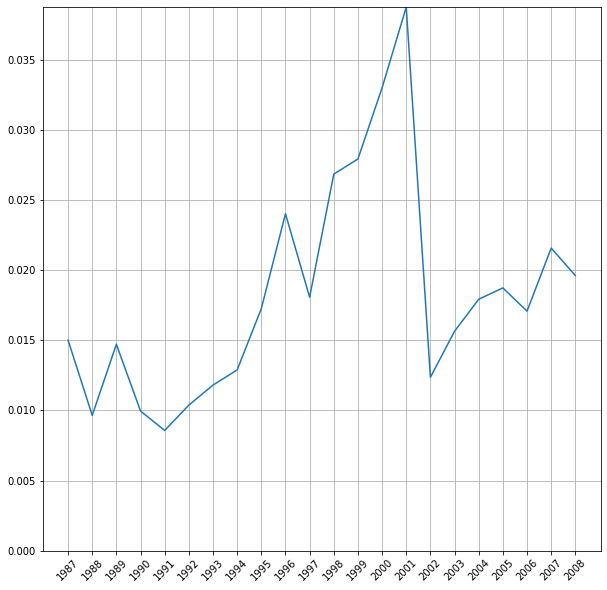

In [68]:
plt.figure(figsize=(10, 10))
plt.ylim(0, max(cancelled_flight))
plt.xticks(range(1987, 2009), rotation=45)
plt.grid()
plt.plot(range(1987, 2009), cancelled_flight)

In [73]:
%%time

adwin = ADWIN()

for year in range(1987, 2009):
    print(year)
    df_tmp = pd.read_csv('DataExpo2009/{0}.csv'.format(year))
    for is_canc in df_tmp.Cancelled:
        adwin.add_element(is_canc)
        if adwin.detected_change():
            print('Change has been detected in {0}'.format(year))

1987
Change has been detected in 1987


C:\Users\User\anaconda3\lib\site-packages\skmultiflow\drift_detection\adwin.py:350: RuntimeWarning: overflow encountered in int_scalars
  self.mdbl_width += self.width


Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987


C:\Users\User\anaconda3\lib\site-packages\skmultiflow\drift_detection\adwin.py:229: RuntimeWarning: overflow encountered in int_scalars
  (u1 - self._total / self._width) / (n1 + self._width)


Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has been detected in 1987
Change has

C:\Users\User\anaconda3\lib\site-packages\skmultiflow\drift_detection\adwin.py:255: RuntimeWarning: overflow encountered in int_scalars
  incremental_variance = n1 * n2 * ((u1 - u2) * (u1 - u2)) / (n1 + n2)


Change has been detected in 1988
Change has been detected in 1988
Change has been detected in 1988
Change has been detected in 1988
Change has been detected in 1988
Change has been detected in 1988
Change has been detected in 1988
Change has been detected in 1988


KeyboardInterrupt: 

### 2) Ozone
https://archive.ics.uci.edu/ml/machine-learning-databases/ozone/

In [43]:
colnames = pd.read_csv('Ozone/eighthr.names')['1'].apply(lambda x: x.split(" ")[0][0:-1]).to_list() + ['is_ozone_day']
df_ozone = pd.read_csv('Ozone/eighthr.data', names= colnames)
df_ozone

,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,is_ozone_day
0,1/1/1998,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.0
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
3,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
4,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,?,?,?,?,?,?,?,?,0.58,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,12/27/2004,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,...,0.07,7.93,-4.41,5800,-25.6,21.8,10295,65,0,0.0
2530,12/28/2004,1,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,...,0.04,5.95,-1.14,5845,-19.4,19.1,10310,15,0,0.0
2531,12/29/2004,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,...,0.06,7.8,-0.64,5845,-9.6,35.2,10275,-35,0,0.0
2532,12/30/2004,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1,1.9,...,0.25,7.72,-0.89,5845,-19.6,34.2,10245,-30,0.05,0.0


1998


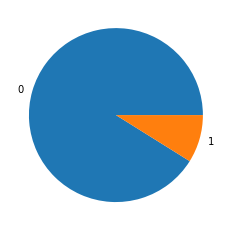

,is_ozone_day
is_ozone_day,
0.0,0.911111
1.0,0.088889


In [49]:
year = '1998'
fig, ax = plt.subplots()
ax.pie(df_ozone[df_ozone.Date.str.contains(year)].groupby('is_ozone_day').agg({'is_ozone_day' : 'count'})['is_ozone_day'], labels= [0, 1])
print(year)
plt.show()
df_ozone[df_ozone.Date.str.contains(year)].groupby('is_ozone_day').agg({'is_ozone_day': lambda x: x.count()/ df_ozone[df_ozone.Date.str.contains(year)]['is_ozone_day'].count()})

2004


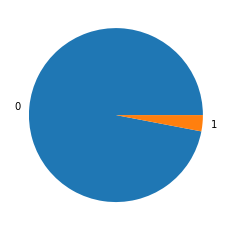

,is_ozone_day
is_ozone_day,
0.0,0.969945
1.0,0.030055


In [50]:
year = '2004'
fig, ax = plt.subplots()
ax.pie(df_ozone[df_ozone.Date.str.contains(year)].groupby('is_ozone_day').agg({'is_ozone_day' : 'count'})['is_ozone_day'], labels= [0, 1])
print(year)
plt.show()
df_ozone[df_ozone.Date.str.contains(year)].groupby('is_ozone_day').agg({'is_ozone_day': lambda x: x.count()/ df_ozone[df_ozone.Date.str.contains(year)]['is_ozone_day'].count()})

In [73]:
df_ozone['year'] = df_ozone.Date.apply(lambda x: x.split("/")[2])
df_ozone.groupby(['year', 'is_ozone_day']).agg({'is_ozone_day' : 'count'})

is_ozone_day
year is_ozone_day              
1998 0.0                    328
     1.0                     32
1999 0.0                    329
     1.0                     29
2000 0.0                    325
     1.0                     40
2001 0.0                    345
     1.0                     20
2002 0.0                    346
     1.0                     10
2003 0.0                    346
     1.0                     18
2004 0.0                    355
     1.0                     11

In [93]:
df_ozone_agg = df_ozone.groupby(['year', 'is_ozone_day'], as_index=False).agg({'is_ozone_day' : 'count'}).groupby(['year'], as_index=False).agg({'is_ozone_day' : ['min', 'sum']})
df_ozone_agg['perc'] = df_ozone_agg[('is_ozone_day', 'min')] / df_ozone_agg[('is_ozone_day', 'sum')]
df_ozone_agg

year is_ozone_day           perc
                 min  sum          
0  1998           32  360  0.088889
1  1999           29  358  0.081006
2  2000           40  365  0.109589
3  2001           20  365  0.054795
4  2002           10  356  0.028090
5  2003           18  364  0.049451
6  2004           11  366  0.030055

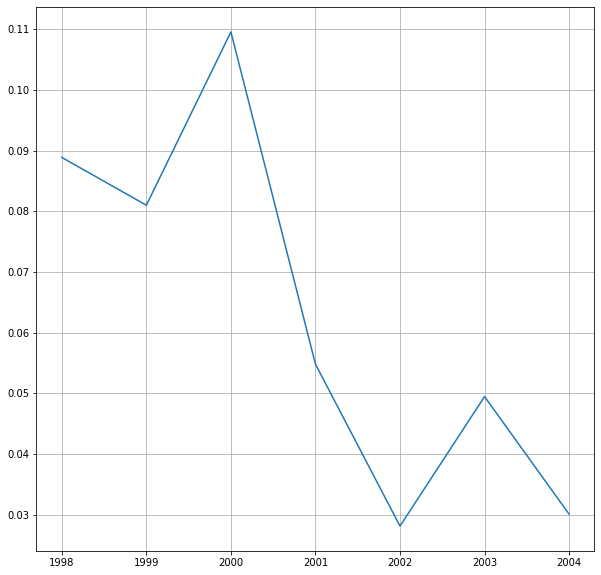

In [98]:
plt.figure(figsize=(10, 10))
plt.grid()
plt.plot(df_ozone_agg['year'], df_ozone_agg['perc'])

### 3) Electricity
dated from 7 May 1996 to 5 December 1998

In [116]:
df_electricity = pd.read_csv('Electisity/electricity-normalized.csv')
df_electricity

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0000,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP
1,0.0000,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP
2,0.0000,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP
3,0.0000,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP
4,0.0000,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN
...,...,...,...,...,...,...,...,...,...
45307,0.9158,7,0.914894,0.044224,0.340672,0.003033,0.255049,0.405263,DOWN
45308,0.9158,7,0.936170,0.044884,0.355549,0.003072,0.241326,0.420614,DOWN
45309,0.9158,7,0.957447,0.043593,0.340970,0.002983,0.247799,0.362281,DOWN
45310,0.9158,7,0.978723,0.066651,0.329366,0.004630,0.345417,0.206579,UP


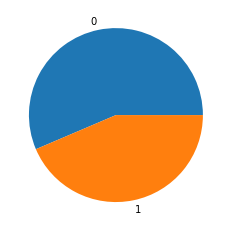

,class
class,
DOWN,0.564156
UP,0.435844


In [111]:
fig, ax = plt.subplots()
ax.pie(df_electricity[df_electricity.date < 0.1].groupby('class').agg({'class' : 'count'})['class'], labels= [0, 1])
plt.show()
df_electricity[df_electricity.date < 0.1].groupby('class').agg({'class': lambda x: x.count()/ df_electricity[df_electricity.date < 0.1]['class'].count()})

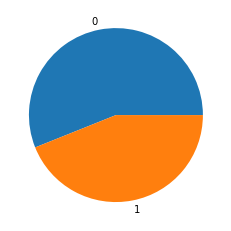

,class
class,
DOWN,0.560644
UP,0.439356


In [112]:
fig, ax = plt.subplots()
ax.pie(df_electricity[df_electricity.date > 0.9].groupby('class').agg({'class' : 'count'})['class'], labels= [0, 1])
plt.show()
df_electricity[df_electricity.date > 0.9].groupby('class').agg({'class': lambda x: x.count()/ df_electricity[df_electricity.date > 0.9]['class'].count()})

In [125]:
df_electricity.date = round(df_electricity.date, 2)
df_electricity_agg = df_electricity.groupby(['date', 'class'], as_index=False).agg({'class' : 'count'}).groupby(['date'], as_index=False).agg({'class' : ['min', 'sum']})
df_electricity_agg['perc'] = df_electricity_agg[('class', 'min')] / df_electricity_agg[('class', 'sum')]
df_electricity_agg = df_electricity_agg[df_electricity_agg[('class', 'sum')] >= 100]
df_electricity_agg

date class            perc
           min   sum          
0   0.00   845  2160  0.391204
1   0.01  1370  3456  0.396412
2   0.02  1379  2928  0.470970
3   0.03  1406  2928  0.480191
4   0.42   285   576  0.494792
5   0.43  1737  3744  0.463942
6   0.44  1133  2976  0.380712
7   0.45  1229  2928  0.419740
8   0.46  1324  3456  0.383102
9   0.47  1459  3600  0.405278
13  0.87  1163  2928  0.397199
14  0.88  1418  3264  0.434436
15  0.89  1418  3792  0.373945
16  0.90  1263  2688  0.469866
17  0.91  1232  2928  0.420765
18  0.92   110   240  0.458333
22  1.00    61   144  0.423611

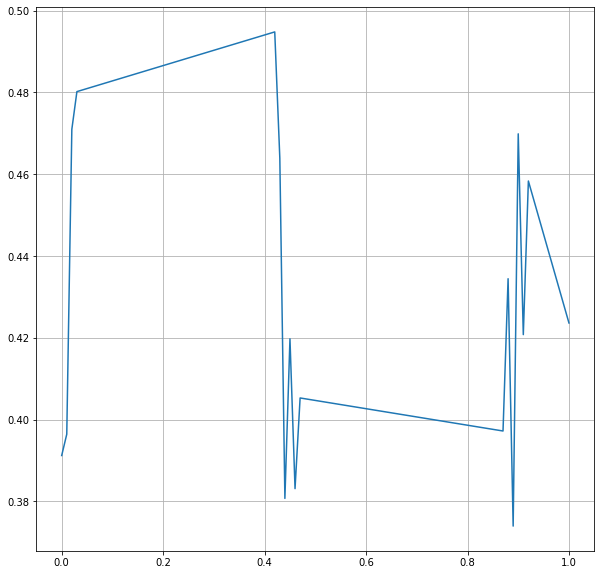

In [126]:
plt.figure(figsize=(10, 10))
plt.grid()
plt.plot(df_electricity_agg['date'], df_electricity_agg['perc'])

In [128]:
h = df_electricity['perc'].hist()
fig = h.get_figure()

KeyError: 'perc'